In [1]:
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [2]:
projpath="/home/tmorshed/projects/def-johngrif/tmorshed/"

In [49]:
def md(input):
    display(Markdown(input))

In [3]:
datapath=os.path.join(projpath, 'data', 'nmod')
gitpath=os.path.join(projpath, 'bme1500')
if os.path.exists(datapath) and os.path.exists(gitpath):
    display(Markdown("success"))
else:
    display(Markdown('fix it'))

success

In [4]:
os.chdir(datapath)

In [5]:
filesDepth5 = glob.glob('*/*/*/*/*')
dirsDepth5 = filter(lambda f: os.path.isdir(f), filesDepth5)

In [8]:
markers=np.sort(np.array([os.path.join(datapath, f) for f in filesDepth5 if f.endswith('.pkl')]))
npzs=np.sort(np.array([os.path.join(datapath, f) for f in filesDepth5 if f.endswith('.npz')]))
_marker=pd.read_pickle(markers[0])
fs=_marker['fs']
dt=1/fs

In [9]:
_marker

{'fs': 5000.0,
 'patientId': 0,
 'clinScore': 2,
 'chNames': ['Fp1',
  'Fp2',
  'F7',
  'F3',
  'Fz',
  'F4',
  'F8',
  'FC5',
  'FC1',
  'FC2',
  'FC6',
  'T7',
  'C3',
  'Cz',
  'C4',
  'T8',
  'TP9',
  'CP5',
  'CP1',
  'CP2',
  'CP6',
  'TP10',
  'P7',
  'P3',
  'Pz',
  'P4',
  'P8',
  'PO9',
  'O1',
  'Oz',
  'O2',
  'PO10',
  'AF7',
  'AF3',
  'AF4',
  'AF8',
  'F5',
  'F1',
  'F2',
  'F6',
  'FT9',
  'FT7',
  'FC3',
  'FC4',
  'FT8',
  'FT10',
  'C5',
  'C1',
  'C2',
  'C6',
  'TP7',
  'CP3',
  'CPz',
  'CP4',
  'TP8',
  'P5',
  'P1',
  'P2',
  'P6',
  'PO7',
  'PO3',
  'POz',
  'PO4',
  'PO8',
  'LB1',
  'LB2',
  'LT',
  'RB1',
  'RB2',
  'RT',
  'Gonio'],
 'stimInt': 0,
 'stimCont': 3,
 'stimType': 'ring',
 'hemisphere': 'L',
 'mrk': [{'type': '', 'idx': 1},
  {'type': 's', 'idx': 144601},
  {'type': 'x', 'idx': 154401},
  {'type': 'x', 'idx': 164201},
  {'type': 'x', 'idx': 174401},
  {'type': 'x', 'idx': 184401},
  {'type': 'x', 'idx': 194401},
  {'type': 'x', 'idx': 204401}

In [10]:
_npz=np.load(npzs[0])
_data=_npz.f.arr_0
del _npz

In [11]:
_df_data=pd.DataFrame(_data,
                      index=_marker['chNames'])
_df_data.columns=_df_data.columns*dt
_df_data.columns.names=['t']
_df_data.index.names=['ch']

In [20]:
## ADD THE STIM FROM .pkl FILE

a=pd.DataFrame(np.zeros((np.shape(_data)[-1]), dtype=str))
a.index=a.index*dt

_dfidx = pd.DataFrame([i['type'] for i in _marker['mrk']], index=[i['idx']*dt for i in _marker['mrk']])
_dfidx=_dfidx.drop(labels=_dfidx.index[0])

for i in tqdm(_dfidx.index):
    a.loc[i]=_dfidx.loc[i]
    
intdict={"":0,
        "s":1,
        "x":2,
        "na":3}

for x in intdict:
    a=a.replace(x, int(intdict[x]))
a=a.T
a.index=['stim']

_df_data=pd.concat([_df_data, a])

100%|██████████| 31/31 [00:00<00:00, 1641.52it/s]


In [21]:
a.columns.names=['t']

In [22]:
b=np.array(a)[0]

TypeError: Markdown expects text, not ('|0|none|', '1:s, 2:x')

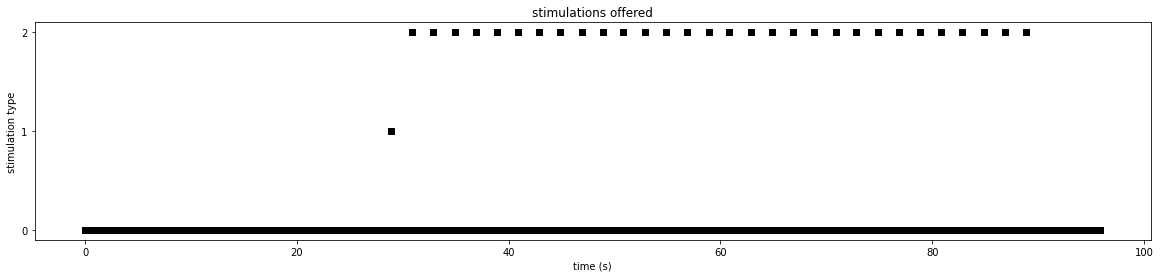

In [ ]:
fig,ax=plt.subplots(figsize=(20,4))
plt.scatter(x=_df_data.columns,y=b, color="k", marker="s")
plt.xlabel('time (s)')
plt.title('stimulations offered')
plt.yticks(np.unique(b))
plt.ylabel('stimulation type')
md()
plt.show()